In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [3]:
MAML_COLOR = "#7f64b9"
MAML_COLOR2 = "#7f64b9"
TCML_COLOR = "#72ac5c" 
ORACLE_COLOR = "#b94b75"
META_COLOR = "#bb7438"

def compare_plot(maml, maml_ci, oracle, oracle_ci, tcml, tcml_ci, oracle2=None, oracle2_ci=None,
                 title='10-shot sinusoid', xlbls=None, set_ylim=True,ylim=None, ylabel='5-shot mean-squared error'):
    
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    num_steps = len(maml)
    if xlbls is None:
        xlbls = range(num_steps)
    maml, maml_ci = np.array(maml), np.array(maml_ci)
    tcml, tcml_ci = np.array(tcml), np.array(tcml_ci)
    oracle, oracle_ci = np.array(oracle), np.array(oracle_ci)
    
    # make tcml extend the entire plot
    tcml_range = range(num_steps)
    tcml_range[0] -= 4
    tcml_range[-1] += 5 
    
    if oracle2 is not None:
        oracle2, oracle2_ci = np.array(oracle2), np.array(oracle2_ci)
    plt.figure(figsize=(8,5))
    plt.plot(xlbls, maml,  color=MAML_COLOR, linewidth=4)
    plt.plot(tcml_range, tcml, '--', color=TCML_COLOR, linewidth=4)
    if oracle2 is not None:
        plt.plot(xlbls, oracle2, ':', color=META_COLOR, linewidth=4)
        plt.fill_between(xlbls, oracle2-oracle2_ci, oracle2+oracle2_ci, alpha=0.5, facecolor=META_COLOR)
    plt.plot(xlbls, oracle, '-.', color=ORACLE_COLOR, linewidth=4)
    plt.fill_between(xlbls, maml-maml_ci, maml+maml_ci,  alpha=0.5, facecolor=MAML_COLOR)
    plt.fill_between(xlbls, oracle-oracle_ci, oracle+oracle_ci, alpha=0.5, facecolor=ORACLE_COLOR)
    plt.fill_between(tcml_range, tcml-tcml_ci, tcml+tcml_ci,  alpha=0.5, facecolor=TCML_COLOR)
    #plt.errorbar(range(num_steps), oracle, yerr=oracle_ci, color='#7aa457')
    #plt.errorbar(range(num_steps), maml, yerr=maml_ci, color='darkgreen')
    if set_ylim:
        plt.ylim([-0.1, max(max(max(maml+maml_ci), max(oracle+oracle_ci)), max(tcml+tcml_ci))+0.1])
        plt.xlim([-3.0, num_steps-1+3.0])
    if ylim:
        plt.ylim(ylim)
    plt.title(title, fontsize=22)
    plt.xlabel('number of gradient steps', fontsize=21)
    plt.ylabel(ylabel, fontsize=21)
    if oracle2 is not None:
        plt.legend([r'MAML, $\alpha=$1e-3', 'SNAIL', r'task-conditioned, $\alpha=$1e-3',r'task-conditioned, $\alpha=$5e-6'], fontsize=19, loc=1)
    else:
        plt.legend(['MAML', 'SNAIL', 'task-conditioned'], fontsize=19)
    plt.show()
    # TCML should be #cb6751
    
def distort_plot(maml,maml_ci, tcml, tcml_ci, title, xlbls, xlabel,ylabel, ylim, meta=None, meta_ci=None, oracle=None, oracle_ci=None):
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    maml, maml_ci = np.array(maml), np.array(maml_ci)
    tcml, tcml_ci = np.array(tcml), np.array(tcml_ci)
    if meta is not None:
        meta, meta_ci = np.array(meta), np.array(meta_ci)
    if oracle is not None:
        oracle, oracle_ci = np.array(oracle), np.array(oracle_ci)
    plt.figure(figsize=(8,5))
    plt.plot(xlbls, maml,  color=MAML_COLOR, linewidth=4)
    plt.plot(xlbls, tcml, '--',  color=TCML_COLOR, linewidth=4)
    if meta is not None:
        plt.plot(xlbls, meta, '-.',  color=META_COLOR, linewidth=4)
        plt.fill_between(xlbls, meta-meta_ci, meta+meta_ci,  alpha=0.5, facecolor=META_COLOR)
    if oracle is not None:
        plt.plot(xlbls, oracle, '-.',  color=ORACLE_COLOR, linewidth=4)
        plt.fill_between(xlbls, oracle-oracle_ci, oracle+oracle_ci,  alpha=0.5, facecolor=ORACLE_COLOR)
    plt.fill_between(xlbls, maml-maml_ci, maml+maml_ci,  alpha=0.5, facecolor=MAML_COLOR)
    plt.fill_between(xlbls, tcml-tcml_ci, tcml+tcml_ci,  alpha=0.5, facecolor=TCML_COLOR)
    plt.ylim(ylim)
    plt.title(title, fontsize=22)
    plt.xlabel(xlabel, fontsize=21)
    plt.ylabel(ylabel, fontsize=21)
    if meta is not None:
        plt.legend(['MAML', 'SNAIL', 'MetaNet'], fontsize=20, loc=4)
    elif oracle is not None:
        plt.legend(['MAML', 'SNAIL', 'task-conditioned'], fontsize=20, loc=4)
    else:
        plt.legend(['MAML', 'SNAIL'], fontsize=20, loc=4)
    plt.show()

    

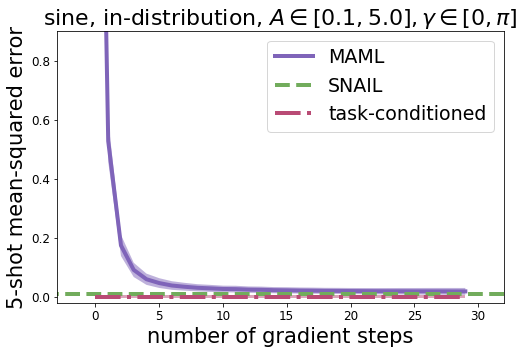

In [4]:
# in distr
# 5-shot sinusoid
# on ada: python3 main.py --datasource=sinusoid --logdir=logs/sine/ --metatrain_iterations=70000 --norm=None --update_batch_size=5 --fc_hidden=100 --num_updates=5 --train=False --context_var=True
maml = [ 2.89493775,  0.52753454,  0.17419587,  0.09138052,  0.05971357,
        0.04678012,  0.03844143,  0.03426391,  0.03076494,  0.02889958,
        0.02681329,  0.02628059,  0.02459252,  0.02400886,  0.0227773 ,
        0.02228556,  0.02151209,  0.02109916,  0.02046935,  0.02021413,
        0.01980171,  0.01957581,  0.01933729,  0.01917421,  0.01910386,
        0.01894088,  0.01891328,  0.01881598,  0.01873604,  0.01863058,
        0.01856061,  0.01846476,  0.01837644,  0.01832053,  0.01824262,
        0.01804594,  0.01803187,  0.0178725 ,  0.01788669,  0.01774913,
        0.01776594,  0.01764641,  0.0176771 ,  0.01757615,  0.01745267,
        0.01759143,  0.01742646,  0.01743259,  0.01748255,  0.01745067,
        0.01726714,  0.01745515,  0.01726814,  0.01724809,  0.01717971,
        0.0171998 ,  0.01715268,  0.01731996,  0.01715511,  0.01716002,
        0.01711269,  0.01713292,  0.01708448,  0.01711312,  0.01707098,
        0.01710564,  0.01706287,  0.01725101,  0.01711504,  0.01711325,
        0.01707458,  0.01711642,  0.01707283,  0.0171135 ,  0.01707078,
        0.0171127 ,  0.01706723,  0.01713533,  0.01706826,  0.01728294,
        0.01714328,  0.01714255,  0.01707327,  0.01712649,  0.01711445,
        0.01714289,  0.01710835,  0.01716425,  0.01711286,  0.01717835,
        0.01712714,  0.01718346,  0.01715744,  0.01716811,  0.01717276,
        0.01721621,  0.01717152,  0.01722362,  0.0172209 ,  0.01720474,
        0.01736307]
maml_ci = [ 0.26110297,  0.07006746,  0.03578655,  0.02408803,  0.01903694,
        0.01650682,  0.0145738 ,  0.01324546,  0.0122163 ,  0.01180546,
        0.01118807,  0.0113704 ,  0.01076139,  0.01081609,  0.01042615,
        0.01045097,  0.01028541,  0.01031437,  0.01022305,  0.01033182,
        0.01035713,  0.01045468,  0.01060792,  0.01085485,  0.01101578,
        0.01116375,  0.01131083,  0.01146582,  0.01153211,  0.01160753,
        0.01168214,  0.0117104 ,  0.01173952,  0.01177035,  0.01180035,
        0.01151323,  0.01163112,  0.01140621,  0.0115378 ,  0.01132421,
        0.01146267,  0.01125476,  0.01143173,  0.01122212,  0.01111731,
        0.01131465,  0.0111477 ,  0.01105202,  0.01133619,  0.01113537,
        0.01104047,  0.0113353 ,  0.01113013,  0.01104555,  0.01106167,
        0.01106954,  0.01107531,  0.01136433,  0.01115849,  0.01112918,
        0.0111406 ,  0.0111485 ,  0.01115492,  0.01116543,  0.01117443,
        0.01118635,  0.01119561,  0.01148702,  0.01132046,  0.01124988,
        0.01126796,  0.01128387,  0.01129366,  0.01130711,  0.01131591,
        0.01132947,  0.01133829,  0.01140064,  0.01136834,  0.01171309,
        0.01153816,  0.01146925,  0.01142714,  0.01146173,  0.01152459,
        0.01152723,  0.01153346,  0.01159268,  0.0115621 ,  0.01163035,
        0.01160211,  0.01167085,  0.01168201,  0.01165957,  0.01172562,
        0.01177379,  0.0117407 ,  0.01180709,  0.01185157,  0.01178747,
        0.01213579]


maml, maml_ci = maml[:30], maml_ci[:30]
num_steps = len(maml)

tcml = 0.00885334
tcml_ci = 0.00070841


oracle = 0.001
oracle_ci = 0.00401 #0.00008

title = 'sine, in-distribution, $A\in[0.1,5.0]$, $\!\gamma \in [0, \pi]$'

compare_plot(maml, maml_ci, [oracle]*num_steps, oracle_ci, [tcml]*num_steps, tcml_ci, title=title, ylim=[-0.02,0.9])


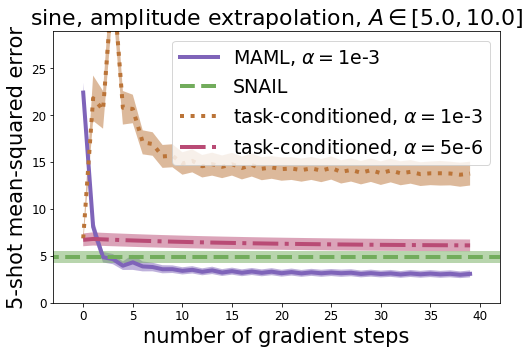

In [5]:
# amp in [5.0, 10.0]

maml = [ 22.42965317,   8.10661411,   4.86460733,   4.65850973,
         3.95722651,   4.31865501,   3.87929654,   3.81716919,
         3.57786918,   3.58800459,   3.40865302,   3.51926756,
         3.30750751,   3.46033192,   3.22676992,   3.37613392,
         3.20383406,   3.34104729,   3.19687605,   3.3201282 ,
         3.15667152,   3.2773757 ,   3.13793898,   3.24941397,
         3.14921927,   3.23096871,   3.1558311 ,   3.2085731 ,
         3.07899165,   3.16348505,   3.07240534,   3.13550925,
         3.02605057,   3.12819815,   3.04188609,   3.11804318,
         3.03698182,   3.09332347,   2.99200892,   3.08751297,
         2.98559642,   3.08312678,   2.97961044,   3.07612371,
         2.96927881,   3.05126095,   2.9513762 ,   3.04208183,
         2.94968796,   3.02801037,   2.93380928,   3.02101064,
         2.93123221,   3.00346923,   2.92540526,   2.990695  ,
         2.91957426,   2.98953724,   2.90955281,   2.98214245,
         2.9042573 ,   2.97370028,   2.90082264,   2.96252275,
         2.89394116,   2.95233536,   2.89083934,   2.94665551,
         2.8893919 ,   2.94335532,   2.87155914,   2.94013071,
         2.86606884,   2.93567801,   2.86552691,   2.93704939,
         2.86084723,   2.92366242,   2.85696292,   2.91864085,
         2.8536253 ,   2.91650677,   2.85621357,   2.90966392,
         2.85350132,   2.89887619,   2.85249114,   2.89562011,
         2.84347177,   2.88794351,   2.83919597,   2.8801651 ,
         2.837116  ,   2.87859797,   2.83910728,   2.87332439,
         2.83493948,   2.86573458,   2.83488107,   2.86465836,   2.83626127]
maml_ci = [ 1.05347168,  0.93755895,  0.56125498,  0.54235953,  0.45388499,
        0.80627531,  0.5262422 ,  0.45811987,  0.43186268,  0.40548843,
        0.38542604,  0.39209563,  0.3718912 ,  0.39338443,  0.36495924,
        0.37560028,  0.36457995,  0.37450817,  0.36702454,  0.37707615,
        0.36526322,  0.37444958,  0.36562565,  0.37488648,  0.37519047,
        0.37563378,  0.38315916,  0.37406129,  0.36188507,  0.37165311,
        0.36280388,  0.36982846,  0.35913375,  0.37308124,  0.36770883,
        0.37340635,  0.36949566,  0.37138265,  0.35908559,  0.37187803,
        0.35993847,  0.37321696,  0.36075389,  0.37300786,  0.36083677,
        0.37087646,  0.35969523,  0.37187269,  0.36073381,  0.36932835,
        0.35897005,  0.36942309,  0.35930061,  0.36700881,  0.35868984,
        0.36423483,  0.35771042,  0.36603263,  0.35710707,  0.3640855 ,
        0.3565172 ,  0.36400878,  0.35583788,  0.36348623,  0.35548684,
        0.36213198,  0.35516214,  0.36206222,  0.3560749 ,  0.36224225,
        0.35502064,  0.36224923,  0.35414499,  0.36250862,  0.35477296,
        0.36480218,  0.35472685,  0.36173055,  0.35393921,  0.36230171,
        0.35371873,  0.36195537,  0.35441127,  0.36113742,  0.35389054,
        0.35944545,  0.35409856,  0.35938999,  0.35338685,  0.35892117,
        0.35361001,  0.35802403,  0.3532196 ,  0.3579179 ,  0.35337543,
        0.3573778 ,  0.35308275,  0.35641357,  0.35424969,  0.35652375,
        0.35371128]

# python3 main.py --datasource=sinusoid --logdir=logs/sine/ --metatrain_iterations=70000 --norm=None --update_batch_size=5 --fc_hidden=100 --baseline=oracle --context_var=True --train=False --train_update_lr=0.001 --update_lr=0.000005
oracle = [ 6.71732616,  6.81194639,  6.76780224,  6.72657442,  6.68801928,
        6.65168095,  6.61733007,  6.58495808,  6.55473042,  6.52642965,
        6.49973583,  6.47460794,  6.45070601,  6.4282918 ,  6.40695715,
        6.38686323,  6.3676672 ,  6.34948206,  6.33237076,  6.3160429 ,
        6.30065298,  6.28613424,  6.27254152,  6.25951433,  6.24724245,
        6.23565817,  6.22481012,  6.21464348,  6.20485735,  6.19559908,
        6.18667459,  6.17847824,  6.17064953,  6.1632266 ,  6.15627241,
        6.14969158,  6.14327049,  6.13718462,  6.13148499,  6.12600803,
        6.1209259 ,  6.11621666,  6.11175013,  6.10752869,  6.10356283,
        6.0996542 ,  6.09608221,  6.09251022,  6.08930635,  6.08635759,
        6.08333778,  6.08053017,  6.07806778,  6.07591152,  6.07384014,
        6.07195568,  6.07048512,  6.06932354,  6.0681591 ,  6.06715298,
        6.06624413,  6.06536674,  6.06464005,  6.06422424,  6.06365442,
        6.06322098,  6.06285858,  6.06277609,  6.06246281,  6.06246233,
        6.06229067,  6.06243896,  6.06246185,  6.06239891,  6.06273842,
        6.06290579,  6.06336498,  6.06364441,  6.06417179,  6.06479979,
        6.06541872,  6.06640434,  6.06728935,  6.06837511,  6.06925726,
        6.07030869,  6.07143307,  6.07282305,  6.07411146,  6.07562685,
        6.07677794,  6.07835913,  6.07969427,  6.08114052,  6.08265114,
        6.08429575,  6.08574438,  6.08732748,  6.08896494,  6.09038877,
        6.09216118]
oracle_ci = [ 0.68375212,  0.7023471 ,  0.6973359 ,  0.69273889,  0.68850046,
        0.68455595,  0.68087327,  0.67739451,  0.67418575,  0.67120522,
        0.6683982 ,  0.66576904,  0.66326284,  0.66094178,  0.65872389,
        0.65664804,  0.6546548 ,  0.65277404,  0.65102142,  0.64931554,
        0.64770716,  0.64619178,  0.64479309,  0.64344811,  0.64219284,
        0.64101636,  0.63990909,  0.63889241,  0.63792163,  0.63699931,
        0.63610315,  0.63531512,  0.63456243,  0.63384253,  0.6331811 ,
        0.63256902,  0.63196927,  0.63139439,  0.6308766 ,  0.63037103,
        0.62993526,  0.62955326,  0.62919545,  0.62887144,  0.62857562,
        0.62825966,  0.62799716,  0.62770665,  0.62747967,  0.62727594,
        0.62705541,  0.62684512,  0.62671411,  0.62659931,  0.62650204,
        0.62644047,  0.62643206,  0.62647039,  0.62648743,  0.62654042,
        0.62659949,  0.62665135,  0.62674326,  0.62688076,  0.6269815 ,
        0.62709153,  0.62722319,  0.62737978,  0.62751395,  0.62767875,
        0.6278199 ,  0.62802196,  0.62818074,  0.62831765,  0.62853825,
        0.62871486,  0.62893736,  0.62913823,  0.62935913,  0.62960416,
        0.62984568,  0.63014871,  0.63043261,  0.63073134,  0.63101631,
        0.63131601,  0.63162524,  0.63197058,  0.63228834,  0.63264251,
        0.63294065,  0.63330644,  0.63362402,  0.63395965,  0.63430989,
        0.63467842,  0.63501906,  0.63537335,  0.63572878,  0.63607788,
        0.6364361 ]

oracle2 = [  6.86851406,  21.83060265,  20.59075356,  34.68941879,
        20.80650139,  20.68226624,  17.1208744 ,  16.9431324 ,
        15.61882496,  15.68834591,  14.86566544,  15.14458179,
        14.57096004,  14.79427719,  14.51085281,  14.78586769,
        14.38348103,  14.70023251,  14.30115032,  14.44555378,
        14.26306343,  14.32408237,  14.15740204,  14.33664894,
        14.10855103,  14.3839941 ,  13.96812344,  14.17356491,
        13.88307953,  14.14548969,  13.83529949,  14.1093502 ,
        13.82161617,  13.96987343,  13.72823429,  13.8155632 ,
        13.82088566,  13.79175091,  13.66678905,  13.78468418,
        13.65431118,  13.75464344,  13.73341656,  13.78015804,
        13.66276836,  13.75572586,  13.58795261,  13.71263027,
        13.52337933,  13.7377634 ,  13.49893284,  13.6289978 ,
        13.49413586,  13.6346693 ,  13.49197578,  13.55123901,
        13.45743752,  13.52654171,  13.46976089,  13.4858017 ,
        13.38603878,  13.47537518,  13.42145634,  13.48864365,
        13.36659145,  13.48788643,  13.34875679,  13.40341759,
        13.32711792,  13.38908482,  13.2756691 ,  13.37765598,
        13.23563576,  13.40358925,  13.21775532,  13.35943699,
        13.21560669,  13.31716347,  13.21990681,  13.29691124,
        13.26362133,  13.30412769,  13.27107906,  13.27900028,
        13.23899841,  13.26218891,  13.2232151 ,  13.24373817,
        13.21924686,  13.23511124,  13.1832552 ,  13.23849201,
        13.17888832,  13.23442173,  13.17938805,  13.23723793,
        13.13146496,  13.18208694,  13.11091805,  13.18868351,  13.12647915]

oracle2_ci = [ 0.48765787,  2.41818929,  2.01363349,  3.14070368,  1.79137063,
        1.5221796 ,  1.28045499,  1.25418901,  1.2229259 ,  1.22712445,
        1.19793546,  1.22691572,  1.19963038,  1.22542477,  1.21016705,
        1.21181691,  1.2187022 ,  1.23027384,  1.22220933,  1.21119213,
        1.23804307,  1.21547055,  1.23404145,  1.22630429,  1.23565483,
        1.24037027,  1.24080551,  1.23760414,  1.24765146,  1.24935198,
        1.25809777,  1.25870657,  1.27915645,  1.25786674,  1.26790833,
        1.26158023,  1.3137064 ,  1.26268959,  1.28376281,  1.27123964,
        1.29262161,  1.2807107 ,  1.30934858,  1.28531563,  1.31162584,
        1.29123843,  1.31228518,  1.2954793 ,  1.31455314,  1.30234778,
        1.32533157,  1.29542387,  1.34260476,  1.3008517 ,  1.3473022 ,
        1.29857421,  1.33093834,  1.30165744,  1.33388066,  1.3116982 ,
        1.34037971,  1.31643283,  1.3475951 ,  1.3259716 ,  1.34758484,
        1.32298589,  1.35315979,  1.32390916,  1.3574928 ,  1.32833982,
        1.35748243,  1.33347321,  1.35706902,  1.34536231,  1.35771215,
        1.34122908,  1.36272967,  1.34170866,  1.36461532,  1.3421607 ,
        1.37105989,  1.34779584,  1.37513816,  1.35091031,  1.37912691,
        1.35407817,  1.38351548,  1.35732651,  1.38664269,  1.36173141,
        1.38691831,  1.3657397 ,  1.38913262,  1.36727965,  1.39145148,
        1.37279809,  1.38796294,  1.36615217,  1.38914919,  1.37103665,
        1.3915627 ]

tcml = 4.86393
tcml_std = 1.41883
tcml_ci = 0.642 #0.11353030522

maml, maml_ci, oracle, oracle_ci, oracle2, oracle2_ci = maml[:40], maml_ci[:40], oracle[:40], oracle_ci[:40], oracle2[:40], oracle2_ci[:40]
num_steps = len(maml)


title = 'sine, amplitude extrapolation, $A\in[5.0,10.0]$'
#compare_plot(maml, maml_ci, oracle, oracle_ci, title=title)
compare_plot(maml, maml_ci, oracle, oracle_ci, [tcml]*num_steps, tcml_ci, oracle2, oracle2_ci, title=title, ylim=[-0.0,29.0])


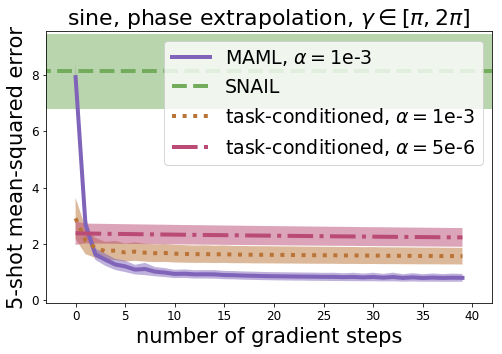

In [6]:
# phase in [pi, 2pi]
maml = [ 7.92536068,  2.67594004,  1.6245023 ,  1.43241084,  1.26354945,
        1.19500065,  1.07922006,  1.10168111,  1.00865209,  0.97467744,
        0.92612892,  0.93448079,  0.91172147,  0.91410947,  0.91091347,
        0.88767129,  0.88075215,  0.86711973,  0.86012542,  0.85028076,
        0.84466922,  0.8403582 ,  0.83561158,  0.83190495,  0.82837421,
        0.82245928,  0.82259965,  0.81194615,  0.8186574 ,  0.80278456,
        0.81781602,  0.79428953,  0.8177343 ,  0.78441173,  0.80523354,
        0.78286481,  0.79648834,  0.78442168,  0.79221886,  0.78729028,
        0.78691489,  0.78645808,  0.78416157,  0.78084493,  0.781394  ,
        0.7797268 ,  0.779522  ,  0.77507329,  0.77783185,  0.77314413,
        0.77654862,  0.7701633 ,  0.77342123,  0.76740634,  0.77321577,
        0.76420349,  0.77190191,  0.76315659,  0.76726741,  0.76242495,
        0.76366335,  0.7620613 ,  0.76139951,  0.75994056,  0.75859469,
        0.75884122,  0.75871396,  0.75572056,  0.75530618,  0.75448883,
        0.75477576,  0.75310218,  0.75255167,  0.75122762,  0.75263578,
        0.7491762 ,  0.75229067,  0.74748421,  0.75046909,  0.74694574,
        0.7487635 ,  0.7484085 ,  0.74686247,  0.74783587,  0.7440412 ,
        0.74948424,  0.74252403,  0.74782741,  0.74227083,  0.74477029,
        0.74313062,  0.74117637,  0.7427339 ,  0.74132627,  0.74062395,
        0.73904395,  0.7401861 ,  0.73880708,  0.73898494,  0.73803979,
        0.73803025]
maml_ci = [ 0.48658669,  0.31098408,  0.20202614,  0.21565475,  0.19753559,
        0.20254573,  0.1708114 ,  0.21840064,  0.16510782,  0.15978459,
        0.14699185,  0.151674  ,  0.14812972,  0.15023682,  0.1520422 ,
        0.14827719,  0.14753056,  0.14680859,  0.14602217,  0.14521845,
        0.14516474,  0.14504007,  0.14552267,  0.14411117,  0.14599968,
        0.14228553,  0.14723372,  0.13897626,  0.14831145,  0.13656229,
        0.15075615,  0.13367233,  0.15414378,  0.13235305,  0.14829563,
        0.13371815,  0.14655423,  0.1371839 ,  0.14486949,  0.14006899,
        0.14392807,  0.1419985 ,  0.14414984,  0.14164045,  0.14414339,
        0.14222139,  0.14423582,  0.14182246,  0.14456418,  0.14177874,
        0.14517409,  0.14151485,  0.14546399,  0.14119649,  0.14618574,
        0.14074959,  0.14647864,  0.14084518,  0.14564952,  0.14116423,
        0.14488913,  0.1418221 ,  0.1449724 ,  0.14181472,  0.1444197 ,
        0.14233294,  0.14512086,  0.14175625,  0.14455536,  0.14218262,
        0.14491262,  0.14199026,  0.14451373,  0.14227124,  0.14462695,
        0.14251497,  0.14502341,  0.14199971,  0.14460294,  0.14247984,
        0.14420956,  0.14368857,  0.14408726,  0.14391348,  0.14343077,
        0.14546368,  0.14303504,  0.14525574,  0.14372532,  0.14402378,
        0.14474058,  0.14228348,  0.14515357,  0.14252645,  0.14520869,
        0.1419412 ,  0.14516415,  0.14210986,  0.14511162,  0.14202344,
        0.14507151]

# python3 main.py --datasource=sinusoid --logdir=logs/sine/ --metatrain_iterations=70000 --norm=None --update_batch_size=5 --fc_hidden=100 --baseline=oracle --context_var=True --train=False --train_update_lr=0.001
oracle = [ 2.9039216 ,  2.10555625,  1.85362935,  1.73467529,  1.7580452 ,
        1.68939447,  1.72060835,  1.68216741,  1.6634742 ,  1.6706897 ,
        1.64732754,  1.63835883,  1.6274581 ,  1.63360214,  1.62240672,
        1.62800276,  1.61504233,  1.61463547,  1.60731411,  1.60765266,
        1.60468411,  1.60125029,  1.59971321,  1.59526205,  1.5931927 ,
        1.59061503,  1.58959162,  1.58313656,  1.58472431,  1.57860327,
        1.58029759,  1.57441223,  1.57430816,  1.57018626,  1.56881571,
        1.56569004,  1.56640184,  1.56234825,  1.56173718,  1.55819511,
        1.55384898,  1.55391109,  1.54877925,  1.55175042,  1.54621267,
        1.54833186,  1.54106426,  1.54536247,  1.53821433,  1.54070592,
        1.53740728,  1.53643894,  1.53284776,  1.5332948 ,  1.52862036,
        1.52938807,  1.52782691,  1.52562618,  1.52216649,  1.52371931,
        1.51832736,  1.5184952 ,  1.51826334,  1.51491725,  1.51136255,
        1.51669085,  1.50929713,  1.5103451 ,  1.50846446,  1.51060116,
        1.50410128,  1.50912368,  1.50237882,  1.50393438,  1.50342238,
        1.50578022,  1.49864185,  1.50229955,  1.4989388 ,  1.50049829,
        1.49935281,  1.49928045,  1.49650192,  1.49865961,  1.4947511 ,
        1.49781001,  1.49508286,  1.49697888,  1.49349678,  1.49719179,
        1.49407434,  1.50004447,  1.49412954,  1.49931741,  1.49566078,
        1.49848902,  1.49775708,  1.4986062 ,  1.49391699,  1.49803495,
        1.49480069]
oracle_ci = [ 0.73177677,  0.47590649,  0.35787317,  0.33202711,  0.34174582,
        0.3203513 ,  0.32842353,  0.31728914,  0.31584924,  0.31728661,
        0.31418902,  0.31214151,  0.3097088 ,  0.31103277,  0.30870143,
        0.30995539,  0.3074919 ,  0.307125  ,  0.30545822,  0.30576798,
        0.30490091,  0.30471566,  0.30412984,  0.30369067,  0.30285147,
        0.3023982 ,  0.30189949,  0.30119777,  0.30105227,  0.30039302,
        0.30049312,  0.29974934,  0.29951242,  0.29882395,  0.2984255 ,
        0.29800799,  0.29763094,  0.29732507,  0.29724982,  0.29656217,
        0.29588285,  0.295692  ,  0.29517722,  0.29518038,  0.29493064,
        0.29460087,  0.29392213,  0.29385933,  0.2935555 ,  0.29340532,
        0.29306906,  0.29277998,  0.29265434,  0.29223958,  0.29194474,
        0.29179579,  0.29154769,  0.29132017,  0.29089934,  0.29058248,
        0.29032153,  0.29028368,  0.2903102 ,  0.28982458,  0.28954154,
        0.28975457,  0.28916132,  0.2893329 ,  0.2889441 ,  0.28937829,
        0.28869492,  0.28896841,  0.2884742 ,  0.28883374,  0.28849539,
        0.28884101,  0.28814703,  0.28855065,  0.28829309,  0.28844079,
        0.28823581,  0.28839949,  0.28828195,  0.28826535,  0.28810892,
        0.28828809,  0.28847319,  0.28843009,  0.28840876,  0.28873831,
        0.28864235,  0.28906941,  0.28896889,  0.2893396 ,  0.28907195,
        0.28951669,  0.28960565,  0.28987381,  0.28977957,  0.29011786,
        0.29019782]

oracle2 = [ 2.37536907,  2.36440086,  2.35966945,  2.35501409,  2.35042834,
        2.34591269,  2.34145761,  2.33707833,  2.33276677,  2.32852793,
        2.32434797,  2.32023406,  2.31618381,  2.31219149,  2.30826569,
        2.30439925,  2.30058908,  2.29682922,  2.29312229,  2.28946996,
        2.28586864,  2.28231502,  2.27880526,  2.27534246,  2.27192354,
        2.26853967,  2.26519561,  2.26189089,  2.25862288,  2.25539947,
        2.25223136,  2.24910045,  2.2460146 ,  2.2429719 ,  2.23995781,
        2.23697805,  2.23403168,  2.23112035,  2.22823882,  2.22538519,
        2.22256804,  2.2197845 ,  2.21703601,  2.21431565,  2.21162701,
        2.20896411,  2.20633125,  2.2037251 ,  2.20114183,  2.19858599,
        2.19605565,  2.19355249,  2.19107842,  2.18863559,  2.1862123 ,
        2.18381763,  2.18144441,  2.17909479,  2.17676568,  2.17446208,
        2.17217851,  2.16991758,  2.16767955,  2.16546011,  2.16325045,
        2.16106391,  2.15888762,  2.15673327,  2.15459847,  2.15248036,
        2.15037608,  2.14829397,  2.14622664,  2.14417911,  2.14215207,
        2.14013934,  2.13815069,  2.1361773 ,  2.13422513,  2.13228774,
        2.13036633,  2.12846351,  2.12658095,  2.12471223,  2.12285733,
        2.12101817,  2.11919093,  2.11738539,  2.11559367,  2.11381602,
        2.1120553 ,  2.11030817,  2.10857081,  2.10684395,  2.10512829,
        2.10342336,  2.10173321,  2.10005116,  2.09837961,  2.09672022,
        2.09506321]
oracle2_ci = [ 0.41534409,  0.35215193,  0.35150853,  0.35087463,  0.35024858,
        0.34963053,  0.34901989,  0.34841776,  0.34782314,  0.34723783,
        0.34665927,  0.34608853,  0.34552521,  0.34496936,  0.34442157,
        0.34388086,  0.3433471 ,  0.34281981,  0.34229848,  0.34178314,
        0.34127375,  0.34077004,  0.34027138,  0.33977896,  0.33929226,
        0.3388105 ,  0.33833364,  0.33786333,  0.33739743,  0.33693734,
        0.33648416,  0.3360354 ,  0.33559293,  0.33515507,  0.33472133,
        0.33429205,  0.33386657,  0.3334454 ,  0.33302811,  0.33261448,
        0.33220464,  0.33179906,  0.3313981 ,  0.33100089,  0.3306078 ,
        0.33021802,  0.32983214,  0.3294501 ,  0.32907122,  0.32869679,
        0.32832584,  0.32795811,  0.32759517,  0.32723576,  0.32687932,
        0.32652643,  0.32617769,  0.32583207,  0.32548985,  0.3251504 ,
        0.32481417,  0.32448089,  0.32415166,  0.32382485,  0.32350039,
        0.32317853,  0.3228597 ,  0.32254303,  0.32222974,  0.32191959,
        0.32161173,  0.32130677,  0.32100448,  0.32070461,  0.3204073 ,
        0.32011271,  0.31982177,  0.31953329,  0.31924742,  0.31896406,
        0.31868288,  0.31840479,  0.3181293 ,  0.31785619,  0.31758526,
        0.31731707,  0.31705099,  0.31678832,  0.31652784,  0.31626958,
        0.31601363,  0.31575966,  0.31550795,  0.31525803,  0.31501028,
        0.31476444,  0.31452072,  0.31427923,  0.31403908,  0.31380111,
        0.3135635 ]

tcml = 8.12676
tcml_ci = 1.33852421126

maml, maml_ci, oracle, oracle_ci = maml[:40], maml_ci[:40], oracle[:40], oracle_ci[:40]
oracle2, oracle2_ci = oracle2[:40], oracle2_ci[:40]
num_steps = len(maml)

title = 'sine, phase extrapolation, $\gamma\in[\pi,2\pi]$'
compare_plot(maml, maml_ci, oracle2, oracle2_ci, [tcml]*num_steps, tcml_ci, oracle, oracle_ci, title=title)


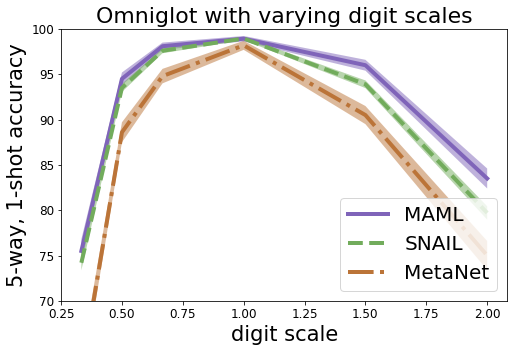

In [7]:
# omniglot scale

maml = [75.5, 94.5, 98.1, 98.93, 96.0, 83.5]
maml_ci = [1.3, 0.7, 0.4, 0.3, 0.6, 1.1]

tcml = [74.2, 93.5, 97.6, 98.95, 93.9, 79.7]
tcml_ci = np.array([0.147, 0.08, 0.049, 0.03, 0.075, 0.13]) * np.sqrt(32)


meta = [62.0, 88.6, 94.8, 98.2, 90.5, 75.0]
meta_ci = [1.6, 1.1, 0.8, 0.5, 1.0, 1.6]

title = 'Omniglot with varying digit scales'
xlabel= 'digit scale'
ylabel = '5-way, 1-shot accuracy'

xlbls = [1.0/3, 0.5, 2.0/3, 1.0, 1.5, 2.0]

distort_plot(maml,maml_ci, tcml, tcml_ci, title, xlbls, xlabel=xlabel,ylabel=ylabel, ylim=[70, 100], meta=meta, meta_ci=meta_ci)


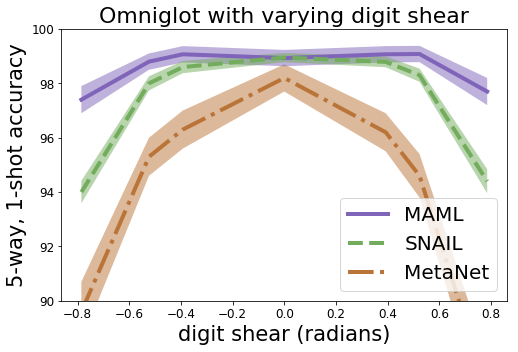

In [8]:
# omniglot shear

maml = [97.4, 98.8, 99.07, 98.93, 99.07, 99.08, 97.7]
maml_ci = [0.5, 0.3, 0.3, 0.3, 0.3, 0.3, 0.5]

tcml = [94.0, 98.0, 98.6, 98.95, 98.79, 98.3, 94.4]
tcml_ci = np.array([0.073, 0.046, 0.040, 0.03, 0.035, 0.043, 0.078]) * np.sqrt(32)

meta = [89.6, 95.3, 96.3, 98.2, 96.2, 94.6, 86.7]
meta_ci = [1.1, 0.7, 0.7, 0.5, 0.7, 0.8, 1.2]

title = 'Omniglot with varying digit shear'
xlabel= 'digit shear (radians)'
ylabel = '5-way, 1-shot accuracy'
xlbls = np.pi*np.array([-1.0/4, -1.0/6, -1.0/8, 0, 1.0/8, 1.0/6, 1.0/4])

distort_plot(maml,maml_ci, tcml, tcml_ci, title, xlbls, xlabel=xlabel, ylabel=ylabel, ylim = [90,100], meta=meta, meta_ci=meta_ci)

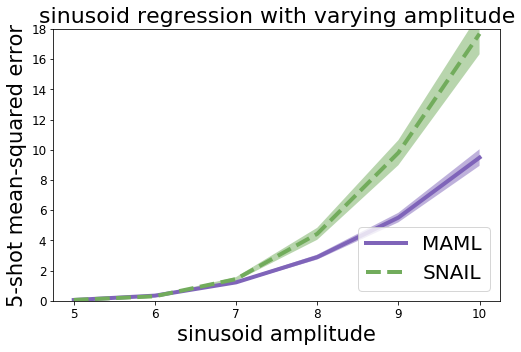

In [9]:
# Sinusoid amp range
xlbls = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
tcml = [0.0586788, 0.299526, 1.4383, 4.43536, 9.80821, 17.6892]
tcml_ci = [0.00977856874585, 0.0314198914557, 0.129461660866, 0.39625510788, 0.828903378668, 1.3615583163]

maml = [0.0521547, 0.34144828, 1.22166836, 2.89288712, 5.51077414,9.48657799]
maml_ci = [0.00716804, 0.02054782, 0.07301649, 0.16396885, 0.31718433,0.54863244]

oracle = None #[0.003, 0.21893756, 1.77370727, 6.21880388, 14.68590641, 27.4783268]
oracle_ci = None #[8.7e-5, 0.00436925, 0.03212017, 0.11408441, 0.277744, 0.5244953]

title = 'sinusoid regression with varying amplitude'
xlabel= 'sinusoid amplitude'
ylabel = '5-shot mean-squared error'

# TODO - add task-conditioned

distort_plot(maml,maml_ci, tcml, tcml_ci, title, xlbls, xlabel=xlabel, ylabel=ylabel, ylim = [0,18], oracle=oracle, oracle_ci=oracle_ci)

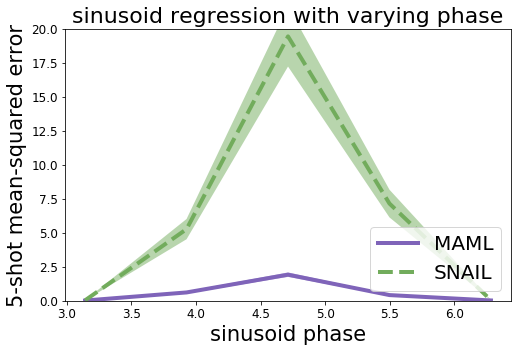

In [10]:
xlbls = [np.pi, 1.25*np.pi, 1.5*np.pi, 1.75*np.pi, 2*np.pi]
tcml = [0.0358792, 5.27492, 19.4548, 7.15409, 0.0483429]
tcml_ci = [0.00571819133313, 0.744509510747, 2.21768810641, 1.01884387794, 0.00799659553995]

maml = [0.01957381, 0.61536127, 1.92288589, 0.42064485, 0.02586637]
maml_ci = [0.00338384, 0.0798156, 0.16465674, 0.05291123, 0.0078321]

#oracle = [0.00212589, 0.14047207, 1.16796064, 3.96932364, 8.16043377]
#oracle_ci = [0.00038376, 0.02395459, 0.15422203, 0.42204565, 0.71158993]

title = 'sinusoid regression with varying phase'
xlabel= 'sinusoid phase'
ylabel = '5-shot mean-squared error'

# TODO - add task-conditioned

distort_plot(maml,maml_ci, tcml, tcml_ci, title, xlbls, xlabel=xlabel, ylabel=ylabel, ylim = [0,20])

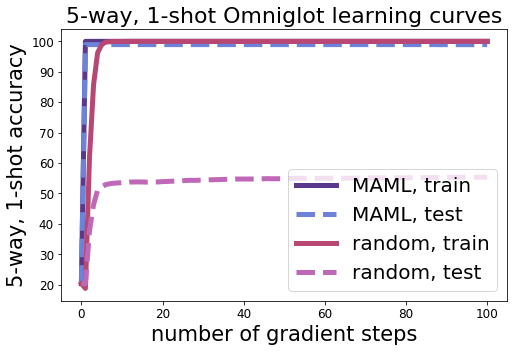

In [11]:
train_rand = 100*np.array([0.20399863,  0.18783212,  0.61783117,  0.85666251,  0.96216583,
        0.98916656,  0.9976666 ,  0.99849993,  0.99966675,  0.99966675,
        0.99966675,  0.99983335,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.       ])
val_rand = 100*np.array([0.20399863,0.20266533,  0.37716684,  0.4630003 ,  0.5108332 ,
        0.5224995 ,  0.52916616,  0.53199953,  0.53366613,  0.53466606,
        0.53533286,  0.53583282,  0.53749949,  0.53783286,  0.53799951,
        0.5378328 ,  0.53733283,  0.53766614,  0.5378328 ,  0.5378328 ,
        0.5389995 ,  0.53933281,  0.54016608,  0.5406661 ,  0.54133278,
        0.54199934,  0.54299939,  0.5433327 ,  0.54299939,  0.54366601,
        0.54416603,  0.54483271,  0.54499936,  0.54533267,  0.54566604,
        0.54633272,  0.54649937,  0.54683274,  0.54733264,  0.54749942,
        0.54749942,  0.54749942,  0.54749942,  0.54766613,  0.54799944,
        0.54849946,  0.54866612,  0.54833281,  0.54849952,  0.54849952,
        0.54899949,  0.54916614,  0.54949951,  0.54999948,  0.54999948,
        0.54966617,  0.54966617,  0.54949951,  0.54933286,  0.54949945,
        0.54983288,  0.54966617,  0.54983288,  0.54983288,  0.54999954,
        0.54999954,  0.54999954,  0.55016619,  0.5503329 ,  0.5503329 ,
        0.5503329 ,  0.55066627,  0.55116618,  0.55116618,  0.55116618,
        0.55116618,  0.55133283,  0.55133283,  0.55149949,  0.55149949,
        0.55166614,  0.55183285,  0.55199951,  0.55199951,  0.55199945,
        0.55216616,  0.55216616,  0.55216616,  0.55199951,  0.55233288,
        0.5529995 ,  0.55333281,  0.55349952,  0.55349952,  0.55349952,
        0.55349952,  0.55333281,  0.55333281,  0.55333281,  0.55333281,
        0.55349952])
train_rand_ci = [0.00935152,  0.00938029,  0.01132294,  0.00873898,  0.00491152,
        0.0027229 ,  0.00121513,  0.00097632,  0.00046159,  0.00046159,
        0.00046159,  0.00032653,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ]
val_rand_ci = [0.00935152, 0.00937587,  0.01110358,  0.01163649,  0.01242396,
        0.01281447,  0.01297029,  0.01298177,  0.01304211,  0.01303372,
        0.01306071,  0.01312974,  0.0130822 ,  0.01309546,  0.0131346 ,
        0.01311989,  0.0131244 ,  0.01314582,  0.01313615,  0.01313615,
        0.01316581,  0.01315452,  0.01317888,  0.01319826,  0.01322392,
        0.01323336,  0.01323922,  0.01325995,  0.01325533,  0.01324031,
        0.01324299,  0.01321971,  0.01324214,  0.01325453,  0.01324284,
        0.01326761,  0.01327376,  0.01328617,  0.0133045 ,  0.01331066,
        0.01331867,  0.01331867,  0.01331867,  0.01333277,  0.01333698,
        0.01333917,  0.01334524,  0.01334912,  0.01334717,  0.01334717,
        0.01334133,  0.01332332,  0.01331143,  0.01331338,  0.01331338,
        0.01330137,  0.01330137,  0.01329539,  0.01328933,  0.01329539,
        0.01326727,  0.01325315,  0.01325922,  0.01325922,  0.0132652 ,
        0.01327324,  0.01327324,  0.01327124,  0.01328532,  0.01331741,
        0.01331741,  0.01332141,  0.01330724,  0.01330724,  0.01330724,
        0.01328316,  0.01327312,  0.01327312,  0.0132871 ,  0.0132871 ,
        0.01328496,  0.01328292,  0.01328086,  0.01328086,  0.01327282,
        0.01328679,  0.01330284,  0.01330284,  0.01331296,  0.0133168 ,
        0.01330828,  0.01329604,  0.01328592,  0.01328592,  0.01328592,
        0.01329395,  0.01330407,  0.01330407,  0.01330407,  0.01330407,
        0.01330999]

train_maml = 100*np.array([0.20349833,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ])
val_maml = np.array([0.20349833, 0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98933321,  0.98933321,
        0.98933321,  0.98933321,  0.98933321,  0.98916656,  0.98916656,
        0.98916656,  0.98916656,  0.98916656,  0.98916656,  0.98916656,
        0.98916656,  0.98916656,  0.98916656,  0.98916656,  0.98933321,
        0.98933321])*100


matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

xlbls = range(101)
plt.figure(figsize=(8,5))

plt.plot(xlbls, train_maml, '-', color='#5a398c', linewidth=5)
plt.plot(xlbls, val_maml, '--', color='#6d83da', linewidth=5)
plt.plot(xlbls, train_rand, '-', color='#b84873', linewidth=5)
plt.plot(xlbls, val_rand, '--', color='#bf68b8', linewidth=5)


#plt.fill_between(xlbls, maml-maml_ci, maml+maml_ci,  alpha=0.5, facecolor=MAML_COLOR)
#plt.fill_between(xlbls, oracle-oracle_ci, oracle+oracle_ci, alpha=0.5, facecolor=ORACLE_COLOR)
#if set_ylim:
#    plt.ylim([-0.1, max(max(max(maml+maml_ci), max(oracle+oracle_ci)), max(tcml+tcml_ci))+0.1])
#    plt.xlim([-1.0, num_steps-1+1.0])
#if ylim:
#    plt.ylim(ylim)
plt.title('5-way, 1-shot Omniglot learning curves', fontsize=22)
plt.xlabel('number of gradient steps', fontsize=21)
plt.ylabel('5-way, 1-shot accuracy', fontsize=21)
plt.legend(['MAML, train', 'MAML, test','random, train', 'random, test'], fontsize=20)
#plt.ylim([0.3,1.1])

#plt.figure()
#plt.plot(range(101), train, 'r-')
#plt.plot(range(101), val, 'b--')
#plt.title('Omniglot classification with random init')
#plt.legend(['random, train', 'random, test', 'MAML, train', 'MAML, test'])
plt.show()

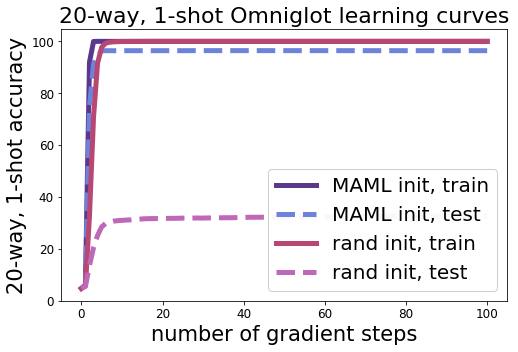

In [12]:
train_rand = 100*np.array([0.04916636,  0.05912488,  0.32841638,  0.70829129,  0.91704333,
        0.97716707,  0.9931252 ,  0.99666649,  0.99820822,  0.99891651,
        0.99941659,  0.99962503,  0.99974996,  0.99983335,  0.99979168,
        0.99987501,  0.99987501,  0.99995828,  0.99995828,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.       ])
val_rand = 100*np.array([0.04916636,0.05658309,  0.1371251 ,  0.20662458,  0.25325009,
        0.28575   ,  0.29945844,  0.3045418 ,  0.30804163,  0.30999991,
        0.31087497,  0.31216654,  0.31270823,  0.31433332,  0.31512508,
        0.31654176,  0.3173334 ,  0.31775001,  0.317875  ,  0.31804168,
        0.31841671,  0.31845823,  0.31879157,  0.31883323,  0.31912491,
        0.31958327,  0.31974986,  0.3196665 ,  0.31999981,  0.31999978,
        0.31979141,  0.32029143,  0.3202914 ,  0.32074973,  0.32095808,
        0.32095799,  0.32129133,  0.3211247 ,  0.32158306,  0.32183301,
        0.32224968,  0.32262471,  0.32283303,  0.32287467,  0.32304138,
        0.32312471,  0.323333  ,  0.32337463,  0.32379133,  0.32391629,
        0.32383296,  0.32412466,  0.32404128,  0.3241663 ,  0.32404134,
        0.32416633,  0.32441634,  0.32424971,  0.3244164 ,  0.32445803,
        0.32454139,  0.32458305,  0.32483301,  0.32491633,  0.32504126,
        0.32516623,  0.32516626,  0.32554123,  0.32570788,  0.32570794,
        0.32583296,  0.32587463,  0.32604128,  0.32612464,  0.32612461,
        0.32633293,  0.3266246 ,  0.32645786,  0.32658291,  0.32654127,
        0.32679126,  0.32691625,  0.32687464,  0.32687467,  0.32699966,
        0.32712466,  0.32712466,  0.32729137,  0.32733303,  0.3272914 ,
        0.32708305,  0.32687473,  0.32687473,  0.32679141,  0.32683307,
        0.32683301,  0.32699972,  0.32695803,  0.32708302,  0.32695806,
        0.32695806])

train_maml = 100*np.array([0.04891637,  0.06224978,  0.9201715 ,  0.99962503,  0.99995828,
        1.        ,  0.99995828,  0.99995828,  0.99991667,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ])
val_maml = 100*np.array([0.04891637,  0.0605414 ,  0.74904042,  0.9135859 ,  0.94562745,
        0.96379352,  0.96404356,  0.96404356,  0.96387684,  0.96396017,
        0.9640435 ,  0.96400189,  0.96408528,  0.96408528,  0.96408528,
        0.96404368,  0.96404368,  0.96400195,  0.96408528,  0.96412688,
        0.96416861,  0.96412688,  0.96412688,  0.96416861,  0.96416861,
        0.96416861,  0.96421021,  0.96421021,  0.9643352 ,  0.9643352 ,
        0.9643352 ,  0.9643352 ,  0.9643352 ,  0.96437693,  0.96437693,
        0.9643352 ,  0.9643352 ,  0.9643352 ,  0.96429354,  0.96429354,
        0.96429354,  0.9643352 ,  0.9643352 ,  0.9643352 ,  0.9643352 ,
        0.9643352 ,  0.9643352 ,  0.96429354,  0.96429354,  0.96429354,
        0.96429354,  0.96429354,  0.96429354,  0.96429354,  0.96429354,
        0.96429354,  0.96429354,  0.96429354,  0.96429354,  0.96429354,
        0.96429354,  0.96429354,  0.96425194,  0.96425194,  0.96425194,
        0.96421033,  0.96421033,  0.96421033,  0.96421033,  0.96421033,
        0.96421033,  0.96421033,  0.96416861,  0.96416861,  0.96416861,
        0.96416861,  0.96416861,  0.96416861,  0.96416861,  0.96416861,
        0.96416861,  0.96416861,  0.96416861,  0.96416861,  0.96416861,
        0.96416861,  0.96416861,  0.96416861,  0.96416861,  0.96416861,
        0.96416861,  0.96416861,  0.96416861,  0.96416861,  0.96416861,
        0.96416861,  0.96416861,  0.96412688,  0.96412688,  0.96412688,
        0.96412688])

matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

xlbls = range(101)
plt.figure(figsize=(8,5))

plt.plot(xlbls, train_maml, '-', color='#5a398c', linewidth=5)
plt.plot(xlbls, val_maml, '--', color='#6d83da', linewidth=5)
plt.plot(xlbls, train_rand, '-', color='#b84873', linewidth=5)
plt.plot(xlbls, val_rand, '--', color='#bf68b8', linewidth=5)


#plt.fill_between(xlbls, maml-maml_ci, maml+maml_ci,  alpha=0.5, facecolor=MAML_COLOR)
#plt.fill_between(xlbls, oracle-oracle_ci, oracle+oracle_ci, alpha=0.5, facecolor=ORACLE_COLOR)
#if set_ylim:
#    plt.ylim([-0.1, max(max(max(maml+maml_ci), max(oracle+oracle_ci)), max(tcml+tcml_ci))+0.1])
#    plt.xlim([-1.0, num_steps-1+1.0])
#if ylim:
#    plt.ylim(ylim)
plt.title('20-way, 1-shot Omniglot learning curves', fontsize=22)
plt.xlabel('number of gradient steps', fontsize=21)
plt.ylabel('20-way, 1-shot accuracy', fontsize=21)
leg = plt.legend(['MAML init, train', 'MAML init, test','rand init, train', 'rand init, test'], fontsize=20, loc='best')
#plt.ylim([0.3,1.1])

#plt.figure()
#plt.plot(range(101), train, 'r-')
#plt.plot(range(101), val, 'b--')
#plt.title('Omniglot classification with random init')
#plt.legend(['random, train', 'random, test', 'MAML, train', 'MAML, test'])
leg.get_frame().set_alpha(0.95)
plt.show()